# Question 4 - Analyze a microbiome dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
#loading the dataset
df = pd.read_csv("T2D_abundance.csv", delimiter = '\t')

In [15]:
df.head()

,Unnamed: 0,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [16]:
df.shape

(344, 574)

In [17]:
df.describe()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Providencia|s__Providencia_stuartii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.109547,0.012080,0.006207,0.000016,0.000680,0.001636,0.001250,0.000016,0.005366,0.000272,...,0.000121,0.000137,0.000002,0.000092,0.000009,0.000034,0.000002,0.000015,0.000007,0.000027
std,0.637722,0.090682,0.063612,0.000293,0.003986,0.010100,0.019552,0.000213,0.018747,0.001512,...,0.002248,0.001897,0.000039,0.001567,0.000158,0.000524,0.000046,0.000270,0.000135,0.000508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002330,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.733550,1.369400,1.023360,0.005440,0.058200,0.159660,0.360720,0.003590,0.

## Principal Component Analysis

In [18]:
dataset = pd.DataFrame(df)

In [19]:
dataset.keys()

Index(['Unnamed: 0',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae',
       'k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actino

In [20]:
ds = dataset.drop(["Unnamed: 0"],axis =1) #dropping the first column from the dataset

In [21]:
ds.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [22]:
ds.shape

(344, 573)

In [23]:
ds["Class"].unique() #Checking the unique elements in the class that shows wherther diabetes or not

array(['n', 't2d'], dtype=object)

In [24]:
ds["Class"] = ds["Class"].replace({"n": 0 , "t2d":1}) #replacing n with 0 and t2d with 1 to help with scaling

In [25]:
array = np.array(ds)

In [26]:
scaler = StandardScaler()
scl = scaler.fit_transform(array)
scl

array([[ 0.35190848, -0.13340934, -0.09771145, ..., -0.05399492,
        -0.05399492, -0.98843892],
       [ 0.60963684,  1.28039659, -0.09771145, ..., -0.05399492,
        -0.05399492, -0.98843892],
       [-0.17202823, -0.13340934, -0.09771145, ..., -0.05399492,
        -0.05399492, -0.98843892],
       ...,
       [-0.17202823, -0.13340934, -0.09771145, ..., -0.05399492,
        -0.05399492, -0.98843892],
       [-0.17202823, -0.13340934, -0.09771145, ..., -0.05399492,
        18.52025918, -0.98843892],
       [-0.17202823, -0.13340934, -0.09771145, ..., -0.05399492,
        -0.05399492, -0.98843892]])

In [27]:
pca = PCA(n_components=2) #PCA analysis to convert to 2D
principalComponents = pca.fit_transform(scl) 
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

In [28]:
principalDf.shape #Successfully reduced the dimension

(344, 2)

In [29]:
principalDf

,Principal Component 1,Principal Component 2
0,-1.133063,-0.424822
1,-0.958939,-0.429131
2,3.609900,-0.106967
3,-0.555653,-0.274648
4,-0.806185,-0.398945
...,...,...
339,1.409064,0.952330
340,-0.381154,-0.177892
341,-0.613712,-0.330035
342,4.666838,0.879543


In [30]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1) #concatenating class to finalDf which is PCA performed data
finalDf

,Principal Component 1,Principal Component 2,Class
0,-1.133063,-0.424822,n
1,-0.958939,-0.429131,n
2,3.609900,-0.106967,n
3,-0.555653,-0.274648,n
4,-0.806185,-0.398945,n
...,...,...,...
339,1.409064,0.952330,n
340,-0.381154,-0.177892,n
341,-0.613712,-0.330035,n
342,4.666838,0.879543,n


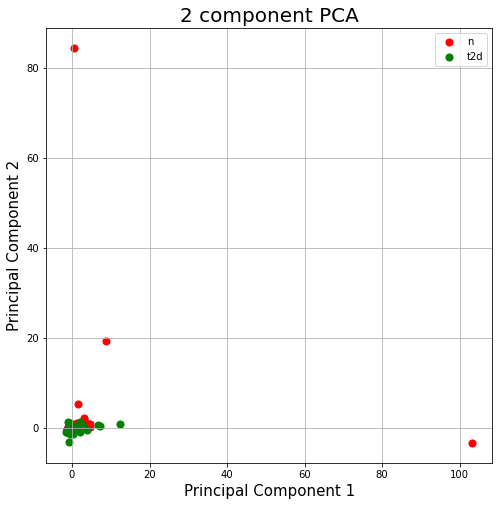

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
r = ['n', 't2d']
t = ['r', 'g']
for r, t in zip(r,t):
    indices = finalDf['Class'] == r
    ax.scatter(finalDf.loc[indices, 'Principal Component 1'], finalDf.loc[indices, 'Principal Component 2'], c = t , s = 50)
ax.legend(['n', 't2d'])
ax.grid()

In [38]:
print( pca.explained_variance_ratio_)
 # from the output we see that the first Principal component contains 5.76% variance and second Principal component contains 3.87% variance

[0.05764676 0.038751  ]


In [39]:
print(f"Total variance: {pca.explained_variance_ratio_.sum()*100} %")

Total variance: 9.639776059074064 %


##### PCA Analysis perfomed using reference from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

## Report on PCA

PCA analysis is basically a dimensionality reduction method that is used to reduce high dimension data sets into smaller ones. Even in our problem PCA helped reduce dimension from (344,573) to (344,2). When the dataset is reduced to two dimensions, the first dimensions captures 5.7% variance and the second dataset captures 3.8% variance for a toal of 9.6% variance for the total dataset. 9.6% variability is too low for PCA to perform. PCA should have an above average variance to perform well but should be under 80% to avoid overfitting. PCA isn't the best dimensionality reducing method to be applied for this dataset.
Clusters of people according to diseases aren't showcased well in the plot after applying PCA. 

# T-Distributed Stochastic Neighbouring Embedding (t-SNE)

In [40]:
df = pd.read_csv("T2D_abundance.csv", delimiter = '\t')
df.keys()

Index(['Unnamed: 0',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae',
       'k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actino

In [41]:
df = df.drop(["Unnamed: 0"], axis=1)

In [42]:
df

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,0.33364,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
1,0.49776,0.12802,0.0,0.0,0.00000,0.0000,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
2,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
3,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
4,0.49446,0.06786,0.0,0.0,0.00000,0.0000,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.04101,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
340,0.00000,0.00000,0.0,0.0,0.00479,0.0000,0.0,0.0,0.01181,0.01625,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
341,0.00000,0.00000,0.0,0.0,0.00242,0.0000,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,n
342,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.12243,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.00086,0.0,0.0,0.00943,n


In [43]:
dfs = df.loc[:, df.columns != 'Class'] 
dfs

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Providencia|s__Providencia_stuartii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii
0,0.33364,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
1,0.49776,0.12802,0.0,0.0,0.00000,0.0000,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
2,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
3,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
4,0.49446,0.06786,0.0,0.0,0.00000,0.0000,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.04101,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
340,0.00000,0.00000,0.0,0.0,0.00479,0.0000,0.0,0.0,0.01181,0.01625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
341,0.00000,0.00000,0.0,0.0,0.00242,0.0000,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
342,0.00000,0.00000,0.0,0.0,0.00000,0.0000,0.0,0.0,0.12243,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00086,0.0,0.0,0.00943


In [44]:
tsne = TSNE(n_components=2, verbose=1, n_iter=1000)
tsne_results = tsne.fit_transform(dfs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 344 samples in 0.000s...
[t-SNE] Computed neighbors for 344 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 344 / 344
[t-SNE] Mean sigma: 9.567743
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.665596
[t-SNE] KL divergence after 1000 iterations: 0.862891


In [45]:
tsne_results

array([[ -2.8371594 ,  -5.9536653 ],
       [ -8.606261  ,   4.300468  ],
       [-10.682792  , -14.860769  ],
       [  3.189553  ,   6.301011  ],
       [ -7.0240564 ,  -7.9069667 ],
       [ 10.703114  ,   1.0086504 ],
       [  9.3844595 ,   0.930594  ],
       [ 19.617487  ,   3.5453007 ],
       [ -8.895041  , -20.259623  ],
       [ -3.6092336 ,  15.495245  ],
       [-18.468548  ,   1.7116214 ],
       [ -6.60539   ,   4.7267885 ],
       [ -9.883339  , -18.755484  ],
       [-12.036431  , -21.534447  ],
       [ 15.390035  ,  12.809836  ],
       [  1.5529879 , -13.317017  ],
       [ -8.26278   ,   0.28798318],
       [-20.683094  ,   2.8836427 ],
       [ 16.75569   ,   3.2283435 ],
       [-13.285752  , -22.497139  ],
       [ -3.2093058 ,  -0.05672716],
       [ -9.2189455 ,   1.1917684 ],
       [  0.85075593,   4.228093  ],
       [  3.2839892 ,  -3.276783  ],
       [-15.36847   , -21.1903    ],
       [-10.059653  , -17.799856  ],
       [  2.5458357 ,  -4.5933843 ],
 

In [46]:
tsneDf = pd.DataFrame(data = tsne_results, columns = ['tsne 1', 'tsne 2'])
tsneDf

,tsne 1,tsne 2
0,-2.837159,-5.953665
1,-8.606261,4.300468
2,-10.682792,-14.860769
3,3.189553,6.301011
4,-7.024056,-7.906967
...,...,...
339,-6.890110,3.938390
340,6.476789,10.314432
341,15.512222,-4.325310
342,-5.641470,-4.442831


In [47]:
finalDf = pd.concat([tsneDf, df[['Class']]], axis = 1) #concatenating class to finalDf which is tsne performed data
finalDf

,tsne 1,tsne 2,Class
0,-2.837159,-5.953665,n
1,-8.606261,4.300468,n
2,-10.682792,-14.860769,n
3,3.189553,6.301011,n
4,-7.024056,-7.906967,n
...,...,...,...
339,-6.890110,3.938390,n
340,6.476789,10.314432,n
341,15.512222,-4.325310,n
342,-5.641470,-4.442831,n


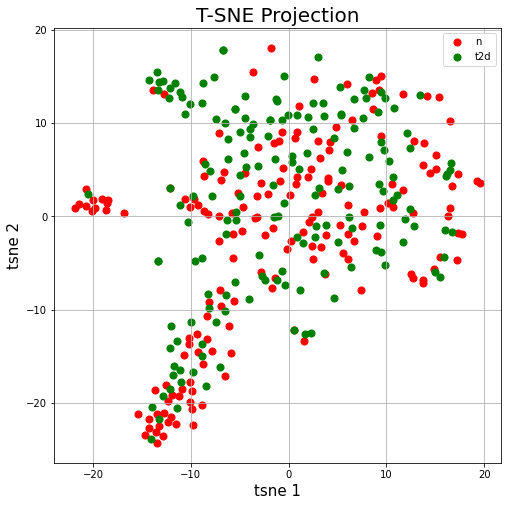

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('tsne 1', fontsize = 15)
ax.set_ylabel('tsne 2', fontsize = 15)
ax.set_title('T-SNE Projection', fontsize = 20)
r = ['n', 't2d']
t = ['r', 'g']
for r, t in zip(r,t):
    indices = finalDf['Class'] == r
    ax.scatter(finalDf.loc[indices, 'tsne 1'], finalDf.loc[indices, 'tsne 2'], c = t , s = 50)
ax.legend(['n', 't2d'])
ax.grid()

#### t-SNE performed using reference from https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

## Report on t-SNE

T-distributed Stochastic Neighbourhood Embedding (tSNE) is also another dimensionality reduction method used to avoid the curse of dimensionality. Unlike PCA which is a mathematical technique, tSNE is a probablistic technique.tSNE is recommended to be used in cases where dimensions are smaller than our dataset to get accurate results. When tSNE is performed, the output should give a clear cluster of variables in their own subgroups. Our visualisation does not have that clear differentiation of clusters present. Thus tSNE does not result in good dimenensionality reduction of this dataset.

# Question 5 - Curse of Dimensionality

In [53]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance 

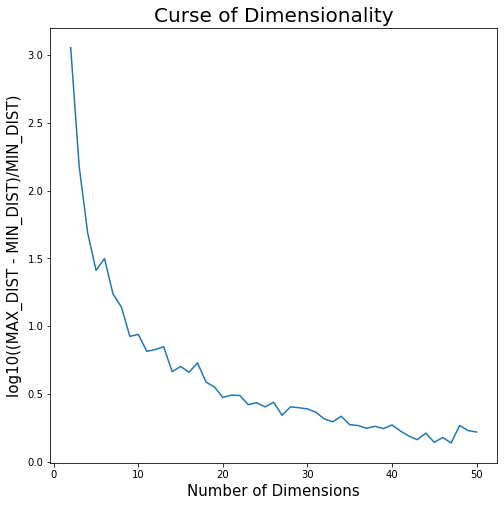

In [54]:
x = []                  #dimension size
y = []                  #distances
for i in range(2,51):   
    x.append(i)  
for i in x:
    dp = np.random.randn(500,i)   #random data points in dimension sizes                
    d = distance.pdist(dp,metric='euclidean') #calculate euclidean distance
    maxd = np.max(d)                    # max distance           
    mind = np.min(d)                    # min distance
    d = math.log10((maxd - mind)/mind)  #log value   
    y.append(d) 
plt.figure(figsize=(8,8))
plt.xlabel("Number of Dimensions", fontsize = 15)
plt.ylabel("log10((MAX_DIST - MIN_DIST)/MIN_DIST)", fontsize = 15)
plt.title("Curse of Dimensionality", fontsize = 20)
plt.plot(x,y)